資料總體描述&想法

1. user都是小五來自不同班級的學生
2. Distribution of scores
3. 使用者在跨平台的學習表現(比如有些人在dp003用玩遊戲的方式表現較好？）
4. 看dp003如果有按照「系統建議」年級進行作答是否就有較好表現？
5. 95位學生資料好像偏少（？
6. 影片時長跟成績似乎沒什麼關聯？
7. 三科成績要怎麼跨著做比較？

感覺不管怎樣還是要先假設在校成績就代表學習成效

Behavior score factors:
＊量化學習影片觀看成效 

1. 先根據他人研究(domain knowledge）給予不同影片觀看行為權重
2. 
3. 生成訓練資料
X = data.drop(columns=['correct_answers'])  # 特徵
y = data['correct_answers']  # 目標變量：答對題數
4. 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pyirt
from pyirt import irt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 1.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.6/781.6 kB 1.7 MB/s eta 0:00:001.8 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


ModuleNotFoundError: No module named 'pyirt'

In [4]:
file_path = '2024初賽用開放資料/user_data.csv'
user = pd.read_csv(file_path)
print(user.head())
print("hi")
print(user.size) #row*column
print(len(user))
print()

dp001_exam = pd.read_csv('2024初賽用開放資料/dp001_exam.csv')
dp001_review_plus = pd.read_csv('2024初賽用開放資料/dp001_review_plus.csv')
dp001_review = pd.read_csv('2024初賽用開放資料/dp001_review.csv')

   user_sn  organization_id  grade  class  seat  chinese_score  math_score  \
0     2697              973      5      2    12             80          52   
1     4381             3740      5      7    18             70          52   
2     4561              973      5      2    16             77          56   
3     6802              973      5      2    15             93          60   
4     6828             3740      5      7    27             83          52   

   english_score  
0             86  
1             57  
2            100  
3             49  
4             89  
hi
760
95



## 11/8

針對dp001_review_plus

目標
1. Highlight出沒有用
2. Highlight出沒有「鑑別度」的題目
- 先列出各題目的正確率分佈
- 篩選出正確率特高/特低的題目進行觀察

3. 

其他
1. 比較有review習慣跟沒有review習慣的人的在校成績？平台成績？

人工定義的criteria的好處是，highlight之後可以比較具體地給予建議
->或者直接讓AI給予建議？！

# 影片觀看習慣-review對在校成績的影響

In [42]:
# 獲取符合條件的 review_sn 列表
review_sn_list = dp001_review_plus.loc[dp001_review_plus['view_action'] == 'review', 'review_sn']
count = review_sn_list.value_counts()
print('hi')
print(len(count))
print(count)
print()

# 在 dp001_review 中篩選出符合 review_sn 的行
result = dp001_review[dp001_review['review_sn'].isin(review_sn_list)]
#print(result)

# 1. 獲取 result 中的 user_sn 列表
user_sn_list = result['user_sn']

# 2. 使用 .isin() 方法從 user_data 中篩選出對應的 user_sn 行
review_highlight_user = user[user['user_sn'].isin(user_sn_list)]
print(review_highlight_user)

review_highlight_user_stats = review_highlight_user.describe().round(1)
print(review_highlight_user_stats)

# 68.7, 46.8, 74.3 (all)
# 70.5, 49.7, 78.4 (review)

hi
223
105368956    5
119413770    4
105379820    3
107563446    3
112930186    3
            ..
107566925    1
107698949    1
108515939    1
108795560    1
123920724    1
Name: review_sn, Length: 223, dtype: int64

    user_sn  organization_id  grade  class  seat  chinese_score  math_score  \
7     11312             2486      5      1     3             97          72   
8     13328             1808      5      3    15             70          44   
10    14503              338      5      3    21             53          20   
11    15995              338      5      3    20             80          60   
18    32737              338      5      3    27             80          88   
19    38371             2486      5      1    13             37          24   
20    38614              338      5      3    24             73          40   
23    46696             1808      5      3     8             67          60   
24    49363              338      5      3    22             87          

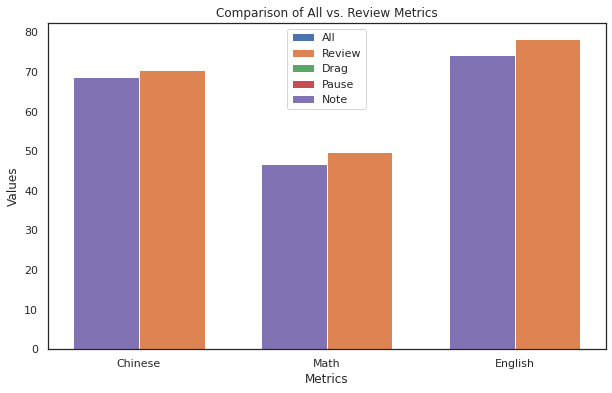

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the chart
categories = ['Chinese', 'Math', 'English']
all_data = [68.7, 46.8, 74.3]
review_data = [70.5, 49.7, 78.4]
drag_data = [69.7, 48.0, 78.4]
paused_data = [69.7, 48.3, 78.8]
note_data = [70.6, 55.2, 79.2]
# 68.7, 46.8, 74.3 (all three platforms)
# 69, 47, 77 (users on dp001)
# 70.5, 49.7, 78.4 (review)
# 69.7, 48.0, 78.4 (dragright + dragleft)
# 70.1, 47.9, 79.1 (slowdown + speedup)
# 69.7, 48.3, 78.8 (paused)
# 72.0, 50, 79 (fuscreenoff)
# 70.6, 55.2, 79.2 (note)

在全體user平均裡面畫一條線
data = [[68.7, 46.8, 74.3], [70.5, 49.7, 78.4], [69.7, 48.0, 78.4]]

# Weight: 
note: 0.1


# Positioning of the bars on the x-axis
x = np.arange(len(categories))

# Bar width
width = 0.35

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, all_data, width, label='All')
plt.bar(x + width/2, review_data, width, label='Review')
plt.bar(x - width/2, all_data, width, label='Drag')
plt.bar(x - width/2, all_data, width, label='Pause')
plt.bar(x - width/2, all_data, width, label='Note')

# Labels and title
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of All vs. Review Metrics')
plt.xticks(x, categories)
plt.legend()

# Display the chart
plt.show()



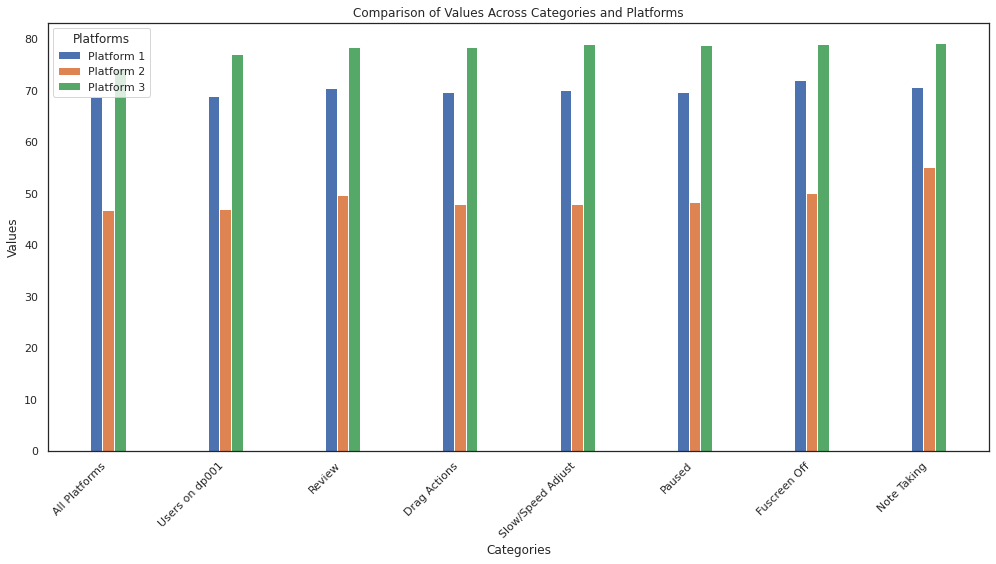

In [64]:
# Updated bar chart for clearer display of each category and data type

# Data values for each category (averages across three platforms)
all_data = [68.7, 46.8, 74.3]
dp001_data = [69, 47, 77]
review_data = [70.5, 49.7, 78.4]
drag_data = [69.7, 48.0, 78.4]
slow_speed_data = [70.1, 47.9, 79.1]
pause_data = [69.7, 48.3, 78.8]
fuscreen_data = [72.0, 50, 79]
note_data = [70.6, 55.2, 79.2]

# Combine data into a list for iteration
data = [all_data, dp001_data, review_data, drag_data, slow_speed_data, pause_data, fuscreen_data, note_data]

# Labels and settings
categories = [
    "All Platforms", "Users on dp001", "Review",
    "Drag Actions", "Slow/Speed Adjust", "Paused",
    "Fuscreen Off", "Note Taking"
]
platforms = ["Chinese", "Math", "English"]
width = 0.1  # Width of each bar
x = np.arange(len(categories))  # X axis for categories

# Plot each platform's values with spacing adjustments
plt.figure(figsize=(14, 8))
for i in range(len(platforms)):
    plt.bar(x + i * width, [d[i] for d in data], width=width, label=platforms[i])

# Customize chart appearance
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Comparison of Values Across Categories and Platforms")
plt.xticks(x + width, categories, rotation=45, ha="right")
plt.legend(title="Platforms")
plt.tight_layout()

plt.show()


In [43]:
# 獲取符合條件的 review_sn 列表
review_sn_list = dp001_review_plus.loc[(dp001_review_plus['view_action'] == 'dragleft') | (dp001_review_plus['view_action'] == 'dragleft'), 'review_sn']
count = review_sn_list.value_counts()
print('hi')
print(len(count))
print(count)
print()

# 在 dp001_review 中篩選出符合 review_sn 的行
result = dp001_review[dp001_review['review_sn'].isin(review_sn_list)]
#print(result)

# 1. 獲取 result 中的 user_sn 列表
user_sn_list = result['user_sn']

# 2. 使用 .isin() 方法從 user_data 中篩選出對應的 user_sn 行
review_highlight_user = user[user['user_sn'].isin(user_sn_list)]
print(review_highlight_user)

review_highlight_user_stats = review_highlight_user.describe().round(1)
print(review_highlight_user_stats)
print()

# 68.7, 46.8, 74.3 (all three platforms)
# 69, 47, 77 (users on dp001)
# 70.5, 49.7, 78.4 (review)
# 69.7, 48.0, 78.4 (dragright + dragleft)
# 70.1, 47.9, 79.1 (slowdown + speedup)
# 69.7, 48.3, 78.8 (paused)
# 72.0, 50, 79 (fuscreenoff)
# 70.6, 55.2, 79.2 (note)

hi
975
116502054    21
107555617    18
116455469    17
116617975    16
122504960    15
             ..
112598297     1
112599162     1
105512970     1
112602726     1
98177578      1
Name: review_sn, Length: 975, dtype: int64

    user_sn  organization_id  grade  class  seat  chinese_score  math_score  \
5      8634             1808      5      3     5             37          24   
6     11303             1808      5      3     3             47          20   
7     11312             2486      5      1     3             97          72   
8     13328             1808      5      3    15             70          44   
10    14503              338      5      3    21             53          20   
11    15995              338      5      3    20             80          60   
13    20034             1808      5      3     1             70          60   
15    23250             1808      5      3    14             87          36   
18    32737              338      5      3    27             8

In [52]:
# 獲取符合條件的 review_sn 列表

review_sn_list = dp001_review_plus.loc[(dp001_review_plus['view_action'] == 'slowdown') | (dp001_review_plus['view_action'] == 'speedup'), 'review_sn']
#review_sn_list = review_sn_list.loc[(dp001_review_plus['view_action'] == 'dragleft') | (dp001_review_plus['view_action'] == 'dragleft'), 'review_sn']

count = review_sn_list.value_counts()
print('hi')
print(len(count))
print(count)
print()

# 在 dp001_review 中篩選出符合 review_sn 的行
result = dp001_review[dp001_review['review_sn'].isin(review_sn_list)]
#print(result)

# 1. 獲取 result 中的 user_sn 列表
user_sn_list = result['user_sn']

# 2. 使用 .isin() 方法從 user_data 中篩選出對應的 user_sn 行
review_highlight_user = user[user['user_sn'].isin(user_sn_list)]
#print(review_highlight_user)

review_highlight_user_stats = review_highlight_user.describe().round(1)
print(review_highlight_user_stats)
print()


hi
480
122495957    34
116457885    28
105382627    26
119415410    24
109597412    23
             ..
109043543     1
108911884     1
108911547     1
108908543     1
124781735     1
Name: review_sn, Length: 480, dtype: int64

        user_sn  organization_id  grade  class  seat  chinese_score  \
count      51.0             51.0   51.0   51.0  51.0           51.0   
mean   152010.5           1380.7    5.0    2.5  11.0           70.1   
std    111394.7            971.3    0.0    1.1   6.7           16.5   
min      4561.0            338.0    5.0    1.0   1.0           30.0   
25%     44555.5            338.0    5.0    1.5   5.5           60.0   
50%    128878.0           1808.0    5.0    3.0  11.0           73.0   
75%    257954.5           2486.0    5.0    3.0  15.0           80.0   
max    316786.0           3740.0    5.0    7.0  27.0           97.0   

       math_score  english_score  
count        51.0           51.0  
mean         47.9           79.1  
std          15.7           

In [55]:
# 獲取符合條件的 review_sn 列表
review_sn_list = dp001_review_plus.loc[(dp001_review_plus['view_action'] == 'fuscreenoff'), 'review_sn']
#review_sn_list = review_sn_list.loc[(dp001_review_plus['view_action'] == 'dragleft') | (dp001_review_plus['view_action'] == 'dragleft'), 'review_sn']

count = review_sn_list.value_counts()
print('hi')
print(len(count))
print(count)
print()

# 在 dp001_review 中篩選出符合 review_sn 的行
result = dp001_review[dp001_review['review_sn'].isin(review_sn_list)]
#print(result)

# 1. 獲取 result 中的 user_sn 列表
user_sn_list = result['user_sn']

# 2. 使用 .isin() 方法從 user_data 中篩選出對應的 user_sn 行
review_highlight_user = user[user['user_sn'].isin(user_sn_list)]
#print(review_highlight_user)

review_highlight_user_stats = review_highlight_user.describe().round(1)
print(review_highlight_user_stats)
print()


hi
341
117864736    34
116576139     6
109599150     6
124378731     6
123722561     4
             ..
111170358     1
110323789     1
110321383     1
110320531     1
124824070     1
Name: review_sn, Length: 341, dtype: int64

        user_sn  organization_id  grade  class  seat  chinese_score  \
count      44.0             44.0   44.0   44.0  44.0           44.0   
mean   164738.4           1269.8    5.0    2.3  11.1           72.0   
std    107445.5            987.4    0.0    0.9   7.0           16.8   
min     11312.0            338.0    5.0    1.0   1.0           30.0   
25%     60948.2            338.0    5.0    1.0   5.8           67.0   
50%    136064.5            655.5    5.0    3.0  10.5           73.0   
75%    270441.2           2486.0    5.0    3.0  14.2           81.8   
max    314389.0           2486.0    5.0    3.0  27.0           97.0   

       math_score  english_score  
count        44.0           44.0  
mean         50.5           79.5  
std          16.0           

In [61]:
# 獲取符合條件的 review_sn 列表
#review_sn_list = dp001_exam['review_sn']
#review_sn_list = dp001_review_plus['review_sn']
review_sn_list = dp001_review_plus.loc[dp001_review_plus['view_action'] == 'note', 'review_sn']

count = review_sn_list.value_counts()
print('hi')
print(len(count))
print(count)
print()

# 在 dp001_review 中篩選出符合 review_sn 的行
result = dp001_review[dp001_review['review_sn'].isin(review_sn_list)]
#print(result)

# 1. 獲取 result 中的 user_sn 列表
user_sn_list = result['user_sn']

# 2. 使用 .isin() 方法從 user_data 中篩選出對應的 user_sn 行
review_highlight_user = user[user['user_sn'].isin(user_sn_list)]
#print(review_highlight_user)

review_highlight_user_stats = review_highlight_user.describe().round(1)
print(review_highlight_user_stats)
print()

# 68.7, 46.8, 74.3 (all three platforms)

hi
7
106579956    5
123716367    2
105272597    1
106579523    1
106700914    1
109599150    1
123722205    1
Name: review_sn, dtype: int64

        user_sn  organization_id  grade  class  seat  chinese_score  \
count       5.0              5.0    5.0    5.0   5.0            5.0   
mean   195094.2           2171.6    5.0    3.0   9.8           70.6   
std    126016.4           1240.1    0.0    2.4   4.0           19.8   
min     11312.0            338.0    5.0    1.0   3.0           43.0   
25%    122299.0           1808.0    5.0    1.0  10.0           63.0   
50%    246112.0           2486.0    5.0    3.0  11.0           73.0   
75%    278962.0           2486.0    5.0    3.0  12.0           77.0   
max    316786.0           3740.0    5.0    7.0  13.0           97.0   

       math_score  english_score  
count         5.0            5.0  
mean         55.2           79.2  
std          18.4           25.4  
min          24.0           37.0  
25%          56.0           74.0  
50%      

In [6]:

print(len(dp001_review_plus))
#print(dp001_review_plus.value_counts())

turbo = len(dp001_review_plus[dp001_review_plus['turbo'].notna()])
print("turbo:", turbo)

review = len(dp001_review_plus[dp001_review_plus['view_action'] == 'review'])
print("review:", review)

print(dp001_review_plus.head())



70064
turbo: 2168
review: 282
   review_plus_sn  review_sn            view_time view_action  timestamp  \
0      1137674337   97932045  2024-01-02 07:38:34      browse       0.00   
1      1137674361   97932045  2024-01-02 07:38:38        play       0.00   
2      1137674372   97932045  2024-01-02 07:38:42      paused       2.99   
3      1137674383   97932045  2024-01-02 07:38:43        play       3.00   
4      1137674421   97932045  2024-01-02 07:38:52      normal      11.92   

   turbo  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    1.0  


In [23]:
import pandas as pd

# 1. 影片行為分類分析
view_action_counts = dp001_review_plus['view_action'].value_counts()
print("各種行為的次數:\n", view_action_counts)
print('hi')
print(list(view_action_counts.index))

# 2. 觀看時間長度分析
# 透過 groupby 來計算不同 view_action 的平均時間戳差異
# 將資料依據 review_sn 分組，計算每個用戶每個行為類型的平均時間
dp001_review_plus['timestamp'] = dp001_review_plus['timestamp'].astype(float)  # 確保 timestamp 是數值型態
average_duration_by_action = dp001_review_plus.groupby('view_action')['timestamp'].mean()
print("各行為的平均觀看時間:\n", average_duration_by_action)

# 3. 播放至結束的比例
end_count = dp001_review_plus[dp001_review_plus['view_action'] == 'end'].shape[0]
total_count = dp001_review_plus.shape[0]
end_ratio = end_count / total_count
print("播放至結束的比例: {:.2%}".format(end_ratio))

# 4. 操作頻率與互動次數
# 計算每位用戶各種行為的次數
interaction_frequency = dp001_review_plus.groupby('review_sn')['view_action'].value_counts().unstack(fill_value=0)
print("每位用戶的互動次數:\n", interaction_frequency)

# 5. Turbo 模式的影響
turbo_usage = dp001_review_plus[dp001_review_plus['turbo'] == 1]
turbo_user_counts = turbo_usage['review_sn'].nunique()
print("使用 Turbo 模式的用戶數:", turbo_user_counts)
turbo_action_counts = turbo_usage['view_action'].value_counts()
print("在 Turbo 模式下的各行為次數:\n", turbo_action_counts)

# 6. 觀看行為的時間段分析
# 將 view_time 轉換為 datetime，並分析不同行為的時段分佈
dp001_review_plus['view_time'] = pd.to_datetime(dp001_review_plus['view_time'])
dp001_review_plus['hour'] = dp001_review_plus['view_time'].dt.hour
action_by_hour = dp001_review_plus.groupby(['view_action', 'hour']).size().unstack(fill_value=0)
print("不同行為在各時段的分佈:\n", action_by_hour)

# 額外：特定群體的篩選條件
# 篩選「深度觀看者」：包含多次 'play' 和 'end' 行為的用戶
deep_viewers = dp001_review_plus[(dp001_review_plus['view_action'] == 'play') | (dp001_review_plus['view_action'] == 'end')]
deep_viewers_count = deep_viewers['review_sn'].nunique()
print("深度觀看者數量:", deep_viewers_count)

# 篩選「快速瀏覽者」：主要行為為 'browse' 或 'turbo' 模式的用戶
browse_turbo_viewers = dp001_review_plus[(dp001_review_plus['view_action'] == 'browse') | (dp001_review_plus['turbo'] == 1)]
browse_turbo_viewers_count = browse_turbo_viewers['review_sn'].nunique()
print("快速瀏覽者數量:", browse_turbo_viewers_count)

# 篩選「專注用戶」：包含多次 'paused' 或 'fullscreenon' 行為的用戶
focused_viewers = dp001_review_plus[(dp001_review_plus['view_action'] == 'paused') | (dp001_review_plus['view_action'] == 'fullscreenon')]
focused_viewers_count = focused_viewers['review_sn'].nunique()
print("專注用戶數量:", focused_viewers_count)


各種行為的次數:
 play           21190
paused         19259
chkptstart      5302
chkptend        5286
dragstart       4030
browse          3997
end             2445
dragleft        2210
normal          1287
fuscreenon      1277
dragright       1166
continue         974
slowdown         540
fuscreenoff      464
speedup          341
review           282
note              12
question           2
Name: view_action, dtype: int64
hi
['play', 'paused', 'chkptstart', 'chkptend', 'dragstart', 'browse', 'end', 'dragleft', 'normal', 'fuscreenon', 'dragright', 'continue', 'slowdown', 'fuscreenoff', 'speedup', 'review', 'note', 'question']
各行為的平均觀看時間:
 view_action
browse           0.000000
chkptend       182.360575
chkptstart     182.418710
continue       174.900975
dragleft       147.566371
dragright      216.595806
dragstart      132.112705
end            370.590470
fuscreenoff    155.491724
fuscreenon      78.590775
normal         153.759277
note           201.809167
paused         167.557642
play      

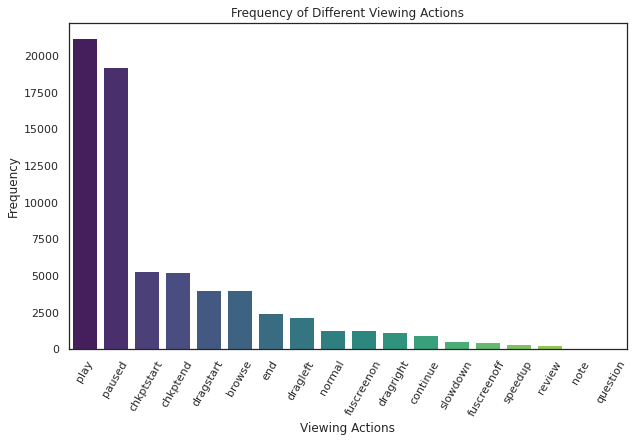

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 各種行為的次數柱狀圖
plt.figure(figsize=(10, 6))
sns.barplot(x=view_action_counts.index, y=view_action_counts.values, palette="viridis")
plt.title("Frequency of Different Viewing Actions")
plt.xlabel("Viewing Actions")
plt.ylabel("Frequency")
plt.xticks(rotation=60)
plt.show()

# 不同行為在各時段的分佈

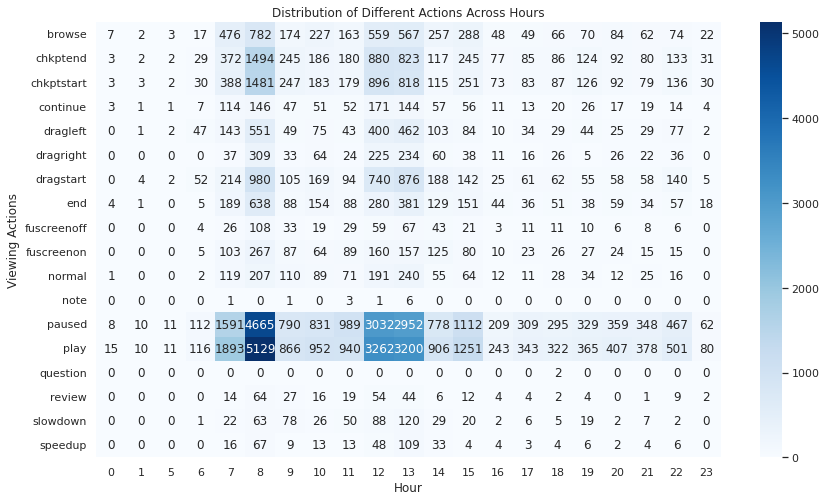

In [26]:
plt.figure(figsize=(14, 8))
sns.heatmap(action_by_hour, cmap="Blues", annot=True, fmt="d", cbar=True)
plt.title("Distribution of Different Actions Across Hours")
plt.xlabel("Hour")
plt.ylabel("Viewing Actions")
plt.show()


# 有完整看完影片的人

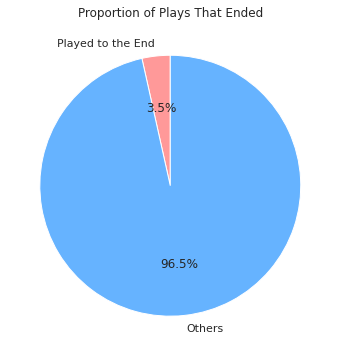

In [27]:
# Display the proportion of plays that ended
plt.figure(figsize=(6, 6))
plt.pie([end_count, total_count - end_count], labels=["Played to the End", "Others"], autopct="%1.1f%%", startangle=90, colors=["#ff9999","#66b3ff"])
plt.title("Proportion of Plays That Ended")
plt.show()


# 每位用戶的互動次數熱力圖

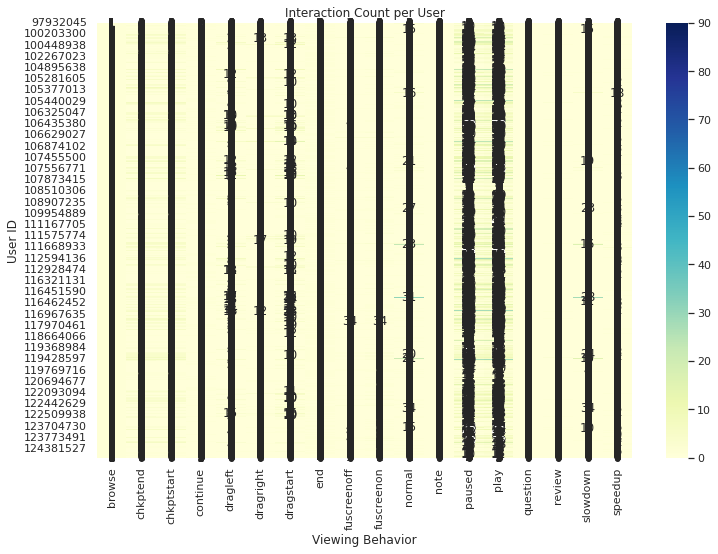

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(interaction_frequency, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Interaction Count per User")
plt.xlabel("Viewing Behavior")
plt.ylabel("User ID")
plt.show()


In [14]:
# Step 2: Descriptive Statistics
# Descriptive stats for user_data
user_stats = user.describe().round(1)
print("User Data Statistics:\n", user_stats)

# Descriptive stats for dp001_exam
exam_stats = dp001_exam.describe().round(1)
print("\nDP001 Exam Statistics:\n", exam_stats)

# Descriptive stats for dp001_review_plus
review_plus_stats = dp001_review_plus.describe().round(1)
print("\nDP001 Review Plus Statistics:\n", review_plus_stats)


User Data Statistics:
         user_sn  organization_id  grade  class  seat  chinese_score  \
count      95.0             95.0   95.0   95.0  95.0           95.0   
mean   151149.1           1948.9    5.0    3.6  11.6           68.7   
std    104663.5           1311.8    0.0    2.2   7.0           17.3   
min      2697.0            338.0    5.0    1.0   1.0           23.0   
25%     48029.5            973.0    5.0    2.0   6.0           60.0   
50%    143323.0           1808.0    5.0    3.0  11.0           73.0   
75%    247022.5           3740.0    5.0    7.0  16.0           80.0   
max    316786.0           3740.0    5.0    7.0  27.0           97.0   

       math_score  english_score  
count        95.0           95.0  
mean         46.8           74.3  
std          15.0           23.6  
min          16.0           17.0  
25%          36.0           63.0  
50%          44.0           80.0  
75%          58.0           95.5  
max          88.0          100.0  

DP001 Exam Statistics

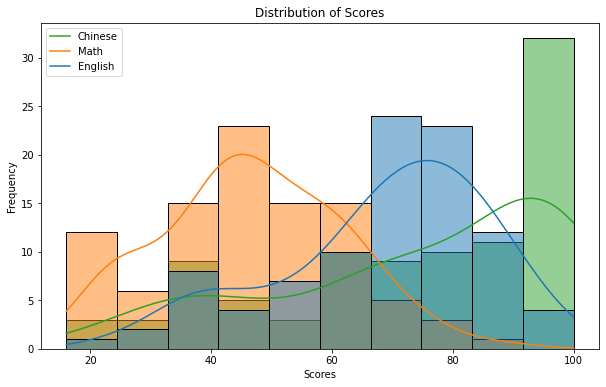

In [4]:
# Step 3: Data Visualization
# Histogram of scores in user_data
plt.figure(figsize=(10, 6))
sns.histplot(data=user[['chinese_score', 'math_score', 'english_score']], bins=10, kde=True) #Kernel Density Estimate Curve
plt.title('Distribution of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.legend(['Chinese', 'Math', 'English'])
plt.show()

0    2024-01-02 09:29:18
1    2024-01-02 09:49:32
2    2024-01-02 15:49:07
3    2024-01-02 15:50:59
4    2024-01-02 15:51:46
Name: finish_time, dtype: object
object


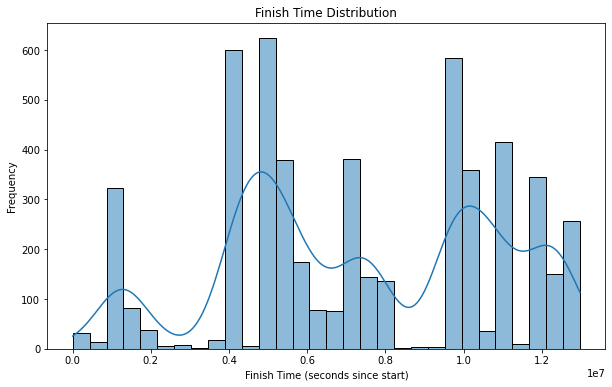

In [5]:
# Inspect the finish_time column
print(dp001_exam['finish_time'].head())
print(dp001_exam['finish_time'].dtype)

# Convert finish_time to datetime
dp001_exam['finish_time'] = pd.to_datetime(dp001_exam['finish_time'])

# If you want to plot the time as the duration from a certain reference time
# For example, if the exam started at '2024-01-02 09:00:00'
start_time = pd.to_datetime('2024-01-02 09:00:00')
dp001_exam['duration'] = (dp001_exam['finish_time'] - start_time).dt.total_seconds()

# Now plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(dp001_exam['duration'], bins=30, kde=True)
plt.title('Finish Time Distribution')
plt.xlabel('Finish Time (seconds since start)')
plt.ylabel('Frequency')
plt.show()

   result_duration
0              0.0
1              0.0
2              0.0
3              0.0
4              0.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13748

    accuracy                           1.00     13748
   macro avg       1.00      1.00      1.00     13748
weighted avg       1.00      1.00      1.00     13748

Confusion Matrix:
 [[13748]]
check:
True     30167
False    15657
Name: result_success, dtype: int64


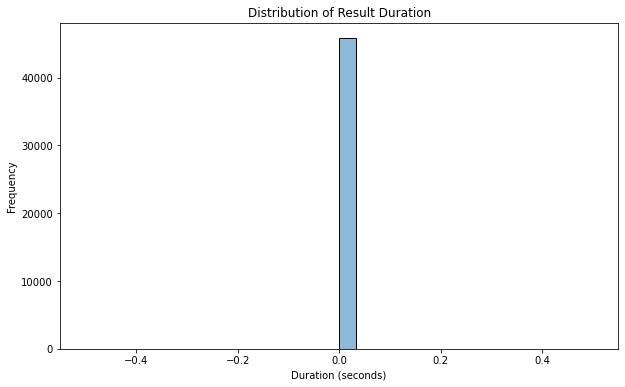

In [8]:
# 待修正
# Step 4: Machine Learning Analysis
# Example: Predicting success in dp002_exam based on game time and question id
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming dp002_exam is already loaded
# Convert the 'result_duration' from ISO 8601 format to total seconds
dp002_exam['result_duration'] = pd.to_timedelta(dp002_exam['result_duration']).dt.total_seconds()

# Check the conversion
print(dp002_exam[['result_duration']].head())

# Preparing the data for modeling
X = dp002_exam[['result_duration']]
y = dp002_exam['result_success'].apply(lambda x: 1 if x == 'true' else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


print("check:")
print(dp002_exam['result_success'].value_counts())

plt.figure(figsize=(10, 6))
sns.histplot(dp002_exam['result_duration'], bins=30, kde=True)
plt.title('Distribution of Result Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

### Discussion
The analysis of user data indicates varying performance in subjects, with potential insights into areas needing improvement. 
Visualizations illustrate the distribution of scores, helping educators identify trends. 
Machine learning models can further predict user performance, facilitating personalized learning paths.
The datasets provide significant value for enhancing educational strategies and student engagement in digital platforms.

# Data Integration

In [15]:
#data integration

'''
# Merge datasets
merged_data = dp001_exam.merge(dp001_review, on='review_sn', how='left') \
                          .merge(dp001_review_plus, on='review_sn', how='left') \
                          .merge(dp002_exam, on='user_sn', how='left') \
                          .merge(dp003_math, on='user_sn', how='left') \
                          .merge(dp003_word, on='user_sn', how='left')
'''

'''
# Example filter: Select relevant rows based on a condition
# Here, we might only want exams that have a score above a certain threshold
filtered_exam = dp001_exam[dp001_exam['score'] > 70]
'''

# Select the first 300 rows of the relevant dataframes
dp001_exam_sample = dp001_exam.head(300)
dp001_review_sample = dp001_review.head(300)
dp001_review_plus_sample = dp001_review_plus.head(300)
dp002_exam_sample = dp002_exam.head(300)
dp003_math_sample = dp003_math.head(300)
dp003_word_sample = dp003_word.head(300)

# Merge the sample datasets
merged_data = dp001_exam_sample.merge(dp001_review_sample, on='review_sn', how='left') \
                                 .merge(dp001_review_plus_sample, on='review_sn', how='left') \
                                 .merge(dp002_exam_sample, on='user_sn', how='left') \
                                 .merge(dp003_math_sample, on='user_sn', how='left') \
                                 .merge(dp003_word_sample, on='user_sn', how='left') \
                                 .merge(user, on='user_sn', how='left')  # Add user_data merge here

# Display merged data
print(merged_data.head())
print(len(merged_data))

    exam_sn  review_sn  question_sn  question_timestamp  binary_res  \
0  25533718   97967614         7940                  63           1   
1  25533718   97967614         7940                  63           1   
2  25533718   97967614         7940                  63           1   
3  25533718   97967614         7940                  63           1   
4  25533718   97967614         7940                  63           1   

          finish_time  ans_time  duration  user_sn indicator_name  ...  \
0 2024-01-02 09:29:18       9.0    1758.0    20034      測量力的工具和方法  ...   
1 2024-01-02 09:29:18       9.0    1758.0    20034      測量力的工具和方法  ...   
2 2024-01-02 09:29:18       9.0    1758.0    20034      測量力的工具和方法  ...   
3 2024-01-02 09:29:18       9.0    1758.0    20034      測量力的工具和方法  ...   
4 2024-01-02 09:29:18       9.0    1758.0    20034      測量力的工具和方法  ...   

  target_vocabulary wrong_times  correct_times  organization_id grade  class  \
0               NaN         NaN            NaN  

# Exploratory Data Analysis (EDA)

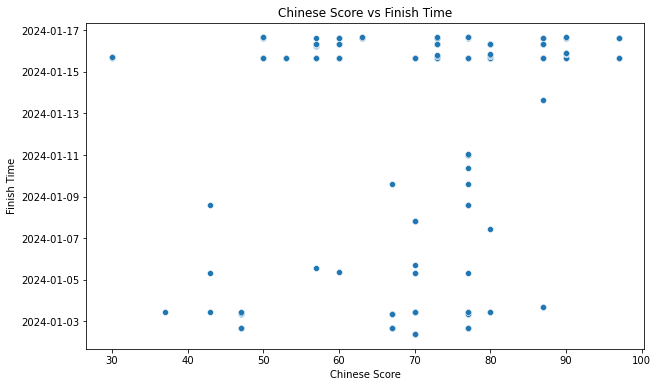

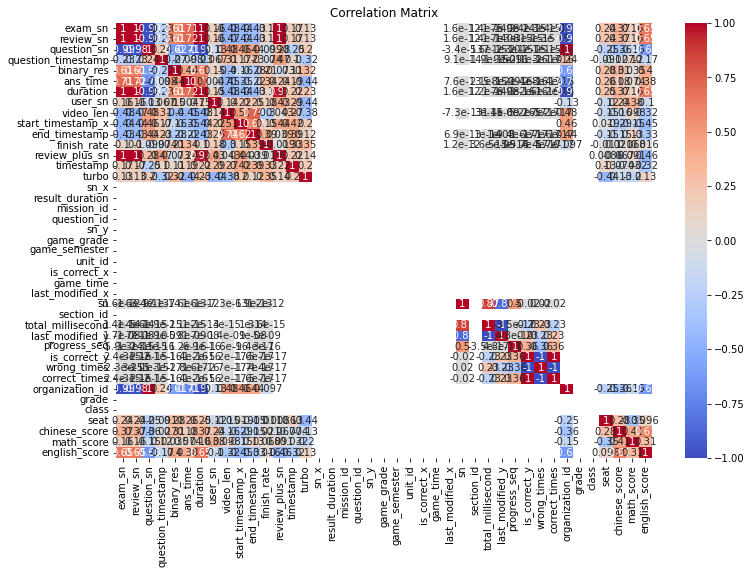

In [18]:
# Exam scores vs user scores
# 只有6個人77分，為什麼77分那邊有9個點？

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='chinese_score', y='finish_time', hue='result_success')
plt.title('Chinese Score vs Finish Time')
plt.xlabel('Chinese Score')
plt.ylabel('Finish Time')
plt.show()

# Check correlation
correlation_matrix = merged_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Model Selection

Predicting Exam Success: Use logistic regression or decision trees to predict if a user will pass based on features from user_data and exam data.


In [19]:
# regression model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare features and target variable
features = merged_data[['chinese_score', 'math_score', 'english_score', 'result_duration']]
target = merged_data['finish_time']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

# Deep Learning Approaches

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')


ModuleNotFoundError: No module named 'tensorflow'

In [1]:
# softmax測試

import math
z = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
z_exp = [math.exp(i) for i in z]  
print(z_exp)  # Result: [2.72, 7.39, 20.09, 54.6, 2.72, 7.39, 20.09] 
sum_z_exp = sum(z_exp)  
print(sum_z_exp)  # Result: 114.98 
softmax = [round(i / sum_z_exp, 3) for i in z_exp]
print(softmax)  # Result: [0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175]


[2.718281828459045, 7.38905609893065, 20.085536923187668, 54.598150033144236, 2.718281828459045, 7.38905609893065, 20.085536923187668]
114.98389973429897
[0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175]


# 隨機森林＆XG Boost

根據 ROC 曲線選擇最佳閾值：你可以繪製 ROC 曲線（Receiver Operating Characteristic curve），並選擇一個 最佳閾值，通常是在 TPR（真正率）和 FPR（假陽性率）之間達到平衡的地方。



In [29]:
import pandas as pd
import numpy as np

# 設定隨機種子
np.random.seed(42)

# 生成範例數據
data = {
    'feature1': np.random.randint(18, 60, size=1000),  # 年齡 (18 到 60 歲)
    'feature2': np.random.randint(2000, 10000, size=1000),  # 月收入 (2000 到 10000)
    'feature3': np.random.choice(['高中', '大學', '碩士', '博士'], size=1000),  # 學歷
    'target': np.random.choice([0, 1], size=1000)  # 是否購買 (0 或 1)
}

# 將資料轉換成 DataFrame
df = pd.DataFrame(data)

# 將學歷轉換為數值型別 (可以使用 one-hot encoding 或 label encoding)
df['feature3'] = df['feature3'].map({'高中': 0, '大學': 1, '碩士': 2, '博士': 3})

# 顯示資料的前五行
print(df.head())


   feature1  feature2  feature3  target
0        56      5228         0       0
1        46      8190         1       0
2        32      4371         0       1
3        25      4891         0       0
4        38      5756         3       1


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 準備資料
X = df[['feature1', 'feature2', 'feature3']]  # 特徵（一個vector）
y = df['target']  # 目標變數

# 分割資料為訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 建立隨機森林模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 訓練模型
rf_model.fit(X_train, y_train)

# 預測
y_pred = rf_model.predict(X_test)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
print(f"隨機森林模型準確率: {accuracy:.4f}")

# 顯示每個特徵的重要性
print("隨機森林特徵重要性:")
feature_importances = rf_model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")


隨機森林模型準確率: 0.4367
隨機森林特徵重要性:
feature1: 0.3503
feature2: 0.6076
feature3: 0.0422


In [65]:
#我們自己的
前提：還需找出跨平台的共同使用者！！

Behavior score factors:
＊量化學習影片觀看成效 

1. 先根據他人研究(domain knowledge）給予不同影片觀看行為權重
2. 
3. 生成訓練資料
X = data.drop(columns=['correct_answers'])  # 特徵
y = data['correct_answers']  # 目標變量：答對題數
->再把這個答對題數正規化成下一層模型的input！
->deep learning?
4. 是否還要確保答題正確率的統計背景是針對真的有review的那些題目？->先不用，有時間用
           
從每個行為找出對應的user進行統計
           
人工label:
如果

SyntaxError: invalid syntax (1941301903.py, line 2)

In [ ]:
# 理論基礎：他人研究＆數據探勘
action_weights = {
    'slowdown': 0.1, #行為科學
    'speedup': 0.1, #行為科學
    'review': 0.2, #自我回饋
    'dragleft': 0.05, #學習深度
    'dragright': 0.05, #學習深度
    'dragstart': 0.1, #學習深度
    'note': 0.2,
}

# 計算每個用戶的行為加權分數
def calculate_behavior_score(row):
    score = 0
    for action, weight in action_weights.items():
        score += row.get(action, 0) * weight
    return score


'''
# 準備資料
X = df[['feature1', 'feature2', 'feature3']]  # 特徵（一個vector）
y = df['target']  # 目標變數

# 分割資料為訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 建立隨機森林模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 訓練模型
rf_model.fit(X_train, y_train)

# 預測
y_pred = rf_model.predict(X_test)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
print(f"隨機森林模型準確率: {accuracy:.4f}")

# 顯示每個特徵的重要性
print("隨機森林特徵重要性:")
feature_importances = rf_model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")'''

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Count specific actions in dp001_review_plus
action_counts = dp001_review_plus[dp001_review_plus['view_action'].isin(['slowdown', 'speedup', 'review', 'dragleft', 'dragright', 'dragstart', 'note'])]
print(len(action_counts))
action_counts = action_counts.groupby('review_sn')['view_action'].value_counts().unstack(fill_value=0)

# Step 2: Calculate the number of questions answered and accuracy rate in dp001_exam
exam_stats = dp001_exam.groupby('review_sn').agg(
    questions_answered=('binary_res', 'size'),
    correct_answers=('binary_res', 'sum')
)
exam_stats['accuracy_rate'] = exam_stats['correct_answers'] / exam_stats['questions_answered']
print('exam stats:', exam_stats)

# Step 3: Merge data with user_data to associate with user_sn
user_action_counts = user[['user_sn', 'review_sn']].merge(action_counts, on='review_sn', how='left').fillna(0)
user_exam_stats = user[['user_sn', 'review_sn']].merge(exam_stats, on='review_sn', how='left').fillna(0)

# Step 4: Combine action counts and exam stats for each user
user_stats = user_action_counts.merge(user_exam_stats, on=['user_sn', 'review_sn'], how='outer').fillna(0)

print(user_stats)


8581
exam stats:            questions_answered  correct_answers  accuracy_rate
review_sn                                                    
97967614                    1                1            1.0
97968472                    1                0            0.0
98080875                    1                0            0.0
98082651                    1                1            1.0
98082950                    1                1            1.0
...                       ...              ...            ...
124780861                   1                0            0.0
124781066                   1                1            1.0
124781105                   1                1            1.0
124781635                   1                0            0.0
124824062                   1                1            1.0

[1794 rows x 3 columns]


KeyError: "['review_sn'] not in index"

In [71]:
#更新版
# Step 1: Merge dp001_review_plus with dp001_review to get user_sn
merged_review = pd.merge(dp001_review_plus, dp001_review[['review_sn', 'user_sn']], on='review_sn', how='left')

# Step 2: Count specific actions in dp001_review_plus
action_counts = merged_review[merged_review['view_action'].isin(['slowdown', 'speedup', 'review', 'dragleft', 'dragright', 'dragstart', 'note'])]
action_counts = action_counts.groupby(['user_sn', 'review_sn'])['view_action'].value_counts().unstack(fill_value=0)
print("hi")
print(len(action_counts))

# Step 3: Calculate the number of questions answered and accuracy rate in dp001_exam
exam_stats = dp001_exam.groupby('review_sn').agg(
    questions_answered=('binary_res', 'size'),
    correct_answers=('binary_res', 'sum')
)
exam_stats['accuracy_rate'] = exam_stats['correct_answers'] / exam_stats['questions_answered']

# Step 4: Merge the action counts and exam stats with user_data
# Merge with user_data based on user_sn
user_action_counts = user[['user_sn']].merge(action_counts, on='user_sn', how='left').fillna(0)
print("yo")
print(len(user_action_counts))
user_exam_stats = user[['user_sn']].merge(exam_stats, on='review_sn', how='left').fillna(0)

# Step 5: Combine action counts and exam stats for each user
user_stats = user_action_counts.merge(user_exam_stats, on='user_sn', how='outer').fillna(0)

print(user_stats)


hi
1888
yo
1927


KeyError: 'review_sn'

In [99]:
import pandas as pd

# 理論基礎：他人研究＆數據探勘
action_weights = {
    'slowdown': 0.15, #行為科學
    'speedup': 0.15, #行為科學
    'review': 0.2, #自我回饋
    'dragleft': 0.1, #學習深度
    'dragright': 0.1, #學習深度
    'dragstart': 0.05, #學習深度
    'note': 0.25,
}

# 計算每個用戶的行為加權分數
def calculate_behavior_score(row):
    score = 0
    for action, weight in action_weights.items():
        score += row.get(action, 0) * weight
    return score



# Merging dp001_review_plus and dp001_review based on 'review_sn' to get 'user_sn'
merged_reviews = pd.merge(dp001_review_plus, dp001_review[['review_sn', 'user_sn']], on='review_sn', how='left')

# Merging with user_data based on 'user_sn'
merged_reviews_user = pd.merge(merged_reviews, user[['user_sn']], on='user_sn', how='left')

# Merging with dp001_exam based on 'review_sn' to get exam data
final_merged = pd.merge(merged_reviews_user, dp001_exam[['review_sn', 'exam_sn', 'binary_res']], on='review_sn', how='left')

# 1. Count specific actions in dp001_review_plus for each user
actions_of_interest = ['slowdown', 'speedup', 'review', 'dragleft', 'dragright', 'dragstart', 'note']
action_counts = final_merged[final_merged['view_action'].isin(actions_of_interest)].groupby('user_sn')['view_action'].value_counts().unstack(fill_value=0)

# 2. Calculate exam statistics (total answers, correct answers, answer rate)
exam_stats = final_merged.groupby('user_sn').agg(
    total_answers=('binary_res', 'size'),
    correct_answers=('binary_res', 'sum')
)

# Calculate the answer rate (correct_answers / total_answers)
exam_stats['answer_rate'] = exam_stats['correct_answers'] / exam_stats['total_answers'] * 100

# Combine both the action counts and exam stats into one final dataframe
final_result = pd.concat([action_counts, exam_stats], axis=1)
final_result = final_result.dropna()

# Show the final result
print(final_result)




'''
# Step 1: Set all values greater than 1 to 1 (binary transformation)
final_result = final_result.applymap(lambda x: 1 if x > 1 else x)

# Step 2: Drop rows with any NaN values
final_result_cleaned = final_result.dropna()

# Show the final cleaned result
print(final_result_cleaned)
'''

#print(len(final_result)) #58




         dragleft  dragright  dragstart  note  review  slowdown  speedup  \
user_sn                                                                    
4561          0.0        0.0        0.0   0.0     0.0       1.0      0.0   
8634          5.0        0.0       16.0   0.0     0.0       0.0      0.0   
11303         1.0        1.0        2.0   0.0     0.0       0.0      1.0   
11312        23.0        0.0       26.0   1.0    32.0      75.0      6.0   
13328        19.0       16.0       40.0   0.0     2.0       1.0      5.0   
14503       249.0        6.0      262.0   0.0    21.0      39.0      1.0   
15995       196.0       11.0      229.0   0.0     8.0       4.0      1.0   
17422         0.0        0.0        0.0   0.0     0.0       0.0      1.0   
20034         1.0        2.0        6.0   0.0     0.0       3.0      7.0   
23250        23.0       11.0       35.0   0.0     0.0       2.0      0.0   
32737        94.0       27.0      129.0   0.0    33.0      10.0      8.0   
38371       

'\n# Step 1: Set all values greater than 1 to 1 (binary transformation)\nfinal_result = final_result.applymap(lambda x: 1 if x > 1 else x)\n\n# Step 2: Drop rows with any NaN values\nfinal_result_cleaned = final_result.dropna()\n\n# Show the final cleaned result\nprint(final_result_cleaned)\n'

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

'''

X = final_result_cleaned.drop(columns=['correct_answers'])  # 特徵
X = X.drop(columns=['answer_rate'])
y = final_result_cleaned['answer_rate']  # 目標變量：答對題數

X['behavior_score'] = X.apply(calculate_behavior_score, axis=1)
'''

'''
y_pred: [ 6.87142472 81.69049393 79.5899291  14.93487909 82.14047578 64.73925842
 75.83341181 80.65084567 11.45025495 75.33165704 80.11913971 62.66421007]
模型的平均絕對誤差 (MAE): 5.5024
'''

# Step 1: Apply lambda function only to the behavior action columns (excluding total_answers, correct_answers, answer_rate)
# Set all values greater than 1 to 1 (binary transformation) for behavior-related columns only
behavior_columns = action_counts.columns  # These columns correspond to view_action counts

final_result[behavior_columns] = final_result[behavior_columns].applymap(lambda x: 1 if x > 1 else x)

# Step 2: Drop rows with any NaN values
#final_result_cleaned = final_result.dropna()

# Show the final cleaned result
#print(final_result_cleaned)


X = final_result.drop(columns=['correct_answers'])  # 特徵
X = X.drop(columns=['answer_rate'])
y = final_result['answer_rate']  # 目標變量：答對題數

X['behavior_score'] = X.apply(calculate_behavior_score, axis=1)

# 3.1 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3.2 建立模型
model = RandomForestRegressor(n_estimators=50, random_state=42)

# 3.3 訓練模型
model.fit(X_train, y_train)

# 3.4 預測並評估模型
y_pred = model.predict(X_test)
#print("y_train:", y_train)
print("y_pred:", y_pred)

# 計算 MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print(f"模型的平均絕對誤差 (MAE): {mae:.4f}")

y_pred: [ 6.87142472 81.69049393 81.67775159 14.87621038 82.14047578 64.73925842
 75.83341181 80.60104647 11.45025495 76.00399478 80.11913971 62.65829345]
模型的平均絕對誤差 (MAE): 5.2736


In [114]:
#print(X['behavior_score']*100)
score = X['behavior_score']*100
#print(score.describe().round(1))
print(score['user_sn'])

user_sn = user['user_sn']

#for i in user_sn:
 #   if i not in score['user']

KeyError: 'user_sn'

In [35]:
!pip3 install --upgrade pip
!pip3 install xgboost
#import xgboost as xgb
from xgboost.xgbclassifier import XGBClassifier
from sklearn.metrics import accuracy_score

# XGBoost 模型訓練
xgb_model = xgb.XGBClassifier(random_state=42)

# 訓練模型
xgb_model.fit(X_train, y_train)

# 預測
y_pred_xgb = xgb_model.predict(X_test)

# 計算準確率
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost模型準確率: {accuracy_xgb:.4f}")

# 顯示每個特徵的重要性
print("XGBoost特徵重要性:")
xgb_importance = xgb_model.feature_importances_
for feature, importance in zip(X.columns, xgb_importance):
    print(f"{feature}: {importance:.4f}")


ModuleNotFoundError: No module named 'xgboost'

In [117]:
score

user_sn
4561       15.0
8634       15.0
11303      40.0
11312      90.0
13328      75.0
14503      75.0
15995      75.0
17422      15.0
20034      55.0
23250      40.0
32737      75.0
38371      50.0
38614      65.0
42415      40.0
46696      75.0
49363      75.0
50836      75.0
54952      75.0
62947      55.0
65038      75.0
104242     60.0
106042     60.0
108139     55.0
108343     45.0
112627     55.0
122299    100.0
122416     75.0
128878     65.0
128932     50.0
143197     50.0
162052     75.0
200920     75.0
201286     75.0
203770     45.0
212767     75.0
221236     75.0
223594     75.0
232372     75.0
243283     75.0
246112     70.0
250399     55.0
255091     75.0
260818     60.0
269746     60.0
272527     15.0
278962    100.0
286321     40.0
286903     60.0
288079     65.0
307570     45.0
311086     75.0
311152     75.0
313378     75.0
313897     75.0
314389     75.0
316786    100.0
Name: behavior_score, dtype: float64

In [118]:
user

,user_sn,organization_id,grade,class,seat,chinese_score,math_score,english_score
0,2697,973,5,2,12,80,52,86
1,4381,3740,5,7,18,70,52,57
2,4561,973,5,2,16,77,56,100
3,6802,973,5,2,15,93,60,49
4,6828,3740,5,7,27,83,52,89
...,...,...,...,...,...,...,...,...
90,312031,973,5,2,2,80,68,97
91,313378,2486,5,1,7,37,36,34
92,313897,338,5,3,10,73,64,89
93,314389,338,5,3,1,87,68,97


In [128]:
print(type(score))


<class 'pandas.core.series.Series'>


In [129]:
# Assuming 'score' is a Series where the index is 'user_sn' and values are 'Score'
score_df = score.reset_index()

# Now 'score_df' will be a DataFrame with two columns: 'user_sn' and 'Score'
# Check the result to ensure it looks correct
print(score_df.head())


   user_sn  behavior_score
0     4561            15.0
1     8634            15.0
2    11303            40.0
3    11312            90.0
4    13328            75.0


In [132]:
import pandas as pd

# Assuming score and user dataframes are already loaded

# Step 1: Calculate the median of the 'Score' column from the 'score' dataframe
median_score = score_df['behavior_score'].median()

# Step 2: Merge the 'user' dataframe with the 'score' dataframe on 'user_sn'
user_with_score = pd.merge(user, score_df[['user_sn', 'behavior_score']], on='user_sn', how='left')

# Step 3: Fill missing scores in the 'Score' column with the median value
user_with_score['behavior_score'] = user_with_score['behavior_score'].fillna(median_score)

# Now 'user_with_score' has the Score column filled with the median where it was missing
print(user_with_score[['user_sn', 'behavior_score']])


    user_sn  behavior_score
0      2697            72.5
1      4381            72.5
2      4561            15.0
3      6802            72.5
4      6828            72.5
..      ...             ...
90   312031            72.5
91   313378            75.0
92   313897            75.0
93   314389            75.0
94   316786           100.0

[95 rows x 2 columns]


In [133]:
# Save the user_with_score DataFrame to a CSV file
user_with_score.to_csv('user_with_scores.csv', index=False)